<a href="https://colab.research.google.com/github/SAIPRIYADODDA/NNDL/blob/main/ASSIGNMENT11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesterov Accelerated Gradient Optimizer

In [1]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()
x_val = [0.2,0.4,0.6,0.8]
y_val = [3.4,3.8,4.2,4.6]

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')

#step 1 initialise values 
m1 = 1.0 
c1 = -1.0  #variable x, y
itr = 100  #epoches
gama = 0.9
vm = vc =0
learning_rate = 0.1  #learning rate
for i in range(0,itr):
    for j in range(0,len(x_val)):
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1+gama*vm) 
        dfmv = dfmv.subs(c, c1+gama*vc) 
        dfmv = dfmv.subs(x, x_val[j]) 
        dfmv = dfmv.subs(y, y_val[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1+gama*vc) 
        dfcv = dfcv.subs(m, m1+gama*vm) 
        dfcv = dfcv.subs(x, x_val[j]) 
        dfcv = dfcv.subs(y, y_val[j]) 
        dfcv = round(dfcv,2)
        #step3 find change in x , y
        vm = (gama * vm)-(learning_rate*dfmv)
        vc = (gama * vc)-(learning_rate*dfcv)
        #step4 update variable 
        m1 = m1 + vm
        m1 = round(m1, 2) 
        c1 = c1 + vc
        c1 = round(c1, 2)
        #step5 increment iterations 
        #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
1.94 3.03
minimum value obtained at m = 1.94 ,c =3.03 for given function


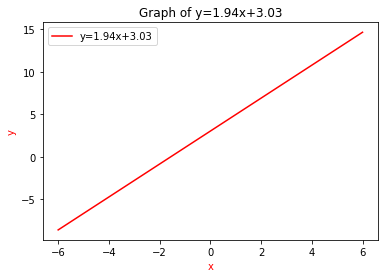

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-6,6,100)
y = m1*x+c1
plt.plot(x, y, '-r', label='y='+str(m1)+'x+'+str(c1))
plt.title('Graph of '+'y='+str(m1)+'x+'+str(c1))
plt.xlabel('x', color='red')
plt.ylabel('y', color='red')
plt.legend(loc='upper left')
#plt.grid()
plt.show()